# Required Libraries
First, we import necessary libraries for our work with PyTorch, as well as other utility libraries for data handling and visualization.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

# Basic Concepts
## Create a 1D Tensor
Let's start by creating a basic one-dimensional tensor using torch.tensor. This is a fundamental building block in PyTorch.



In [ ]:
# Create a 1D tensor
x = torch.tensor([1, 2, 3])

print(f'Tensor: {x}')
print(f'Tensor shape: {x.shape}')

Tensor: tensor([1, 2, 3])
Tensor shape: torch.Size([3])


##Create a Tensor of Zeros
Next, we create a tensor filled with zeros using torch.zeros. This is useful for initializing weights in neural networks.

In [ ]:
# Create a tensor of zeros
x = torch.zeros(2, 3)
print(f'Zeros Tensor:\n{x}')

Zeros Tensor:
tensor([[0., 0., 0.],
        [0., 0., 0.]])


##Create a Random Tensor
Here, we create a tensor with random values using torch.rand. This can be used for stochastic processes and initializing weights randomly.

In [ ]:
# Create a random tensor
x = torch.rand(size=(3, 4))
print(f'Random Tensor:\n{x}')

Random Tensor:
tensor([[0.6765, 0.0860, 0.4559, 0.3677],
        [0.9532, 0.9580, 0.1793, 0.1371],
        [0.6012, 0.1261, 0.9353, 0.1900]])


## Create a 2D Tensor
We create a two-dimensional tensor to illustrate how PyTorch handles higher-dimensional data.

In [ ]:
# Create a 2D tensor
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(f'Tensor:\n{x}')

Tensor:
tensor([[1, 2, 3],
        [4, 5, 6]])
Reshaped Tensor:
tensor([[1, 2],
        [3, 4],
        [5, 6]])
Sum of two tensors:
 tensor([[2, 3, 4],
        [5, 6, 7]])


##Reshape the Tensor
Reshaping tensors is often required in machine learning tasks to ensure the data fits the model's input requirements.

In [ ]:
# Reshape the tensor
x_reshaped = x.view(3, 2)
print(f'Reshaped Tensor:\n{x_reshaped}')

##Summation Operation
We demonstrate element-wise summation of two tensors, which is a basic but essential operation in many neural network computations

In [ ]:
# Summation operation
y = torch.tensor([[1, 1, 1], [1, 1, 1]])
z = x + y
print(f'Sum of two tensors:\n {z}')

# Autograd
## Create a Computational Graph for Backpropagation
Autograd in PyTorch is used for automatic differentiation. Here, we create a simple computational graph and calculate gradients.

In [ ]:
# Create a computational graph to calculate gradients in BackPropogation
x = torch.tensor([1.0, 2.0, 6.0], requires_grad=True)

# Mathematical calculus
y = x * 2
z = y.mean()

# Calculate Gradient
z.backward()
print(x.grad)

tensor([0.6667, 0.6667, 0.6667])


# Dataset & DataLoader
## Custom Dataset Class
We create a custom dataset class by subclassing torch.utils.data.Dataset. This is necessary for handling our training and validation data in a structured manner.

In [ ]:
# Dataset and Dataloader
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.len = self.X.shape[0]

    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return self.len

## Create Training and Validation Data
We generate synthetic training and validation data to simulate a dataset for our model to learn from.

In [ ]:
# Make train data
X_train = torch.rand(size=(50, 1))
y_train = X_train**3 + 2

# Make validation data
X_val = torch.rand(size=(20, 1))
y_val = X_val**3 + 2

## Create DataLoaders
DataLoaders are used to iterate over the dataset in batches. This is crucial for training neural networks efficiently.

In [ ]:
# Make train loader
trainset = MyDataset(X_train, y_train)
train_loader = DataLoader(trainset, batch_size=4, shuffle=True)

# Make test loader
valset = MyDataset(X_val, y_val)
val_loader = DataLoader(valset, batch_size=4, shuffle=True)

# Neural Network (MLP)
## Define the Model
We define a simple multi-layer perceptron (MLP) for predicting the function
𝑦
=
𝑥^3
+
2
This involves defining layers and the forward pass.

In [ ]:
# MLP for predicting y= x^3 + 2 line
class SimpleModel(nn.Module):
    def __init__(self, input_size, output_size):
      super(SimpleModel, self).__init__()
      self.fc1 = nn.Linear(input_size, 15)
      self.relu = nn.ReLU()
      self.fc2 = nn.Linear(15, output_size)

    def forward(self, x):
      x = self.fc1(x)
      x = self.relu(x)
      x = self.fc2(x)
      return x

## Initialize Model, Loss Function, and Optimizer
We instantiate the model, define the mean squared error loss function, and set up the stochastic gradient descent optimizer.

In [ ]:
input_size, output_size = X_train.shape[1], y_train.shape[1]
model = SimpleModel(input_size, output_size)

# Loss functiona and Optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

## Training the Model
The training loop involves feeding batches of data through the model, calculating loss, backpropagating gradients, and updating the model parameters.

In [ ]:
# Lists to store loss values
train_losses = []
val_losses = []

for epoch in range(25):
    # Training phase
    model.train()
    epoch_train_loss = 0
    for X_train, y_train in train_loader:
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

    epoch_train_loss /= len(train_loader)
    train_losses.append(epoch_train_loss)

    # Validation phase
    model.eval()
    epoch_val_loss = 0
    with torch.no_grad():
        for X_val, y_val in val_loader:
            val_outputs = model(X_val)
            loss = criterion(val_outputs, y_val)
            epoch_val_loss += loss.item()

    epoch_val_loss /= len(val_loader)
    val_losses.append(epoch_val_loss)

    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/25], Training Loss: {epoch_train_loss:.4f},\
         Validation Loss: {epoch_val_loss:.4f}')

Epoch [5/25], Training Loss: 0.0614,         Validation Loss: 0.0505
Epoch [10/25], Training Loss: 0.0346,         Validation Loss: 0.0364
Epoch [15/25], Training Loss: 0.0231,         Validation Loss: 0.0264
Epoch [20/25], Training Loss: 0.0163,         Validation Loss: 0.0207
Epoch [25/25], Training Loss: 0.0138,         Validation Loss: 0.0166


## Plotting the Training and Validation Loss
Finally, we plot the training and validation loss over epochs to visualize the model's learning process and detect overfitting or underfitting.

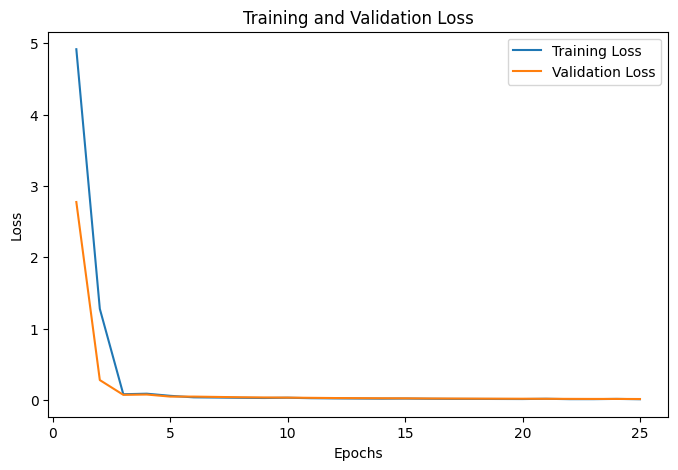

In [ ]:
plt.figure(figsize=(8, 5))

plt.plot(range(1, 26), train_losses, label='Training Loss')
plt.plot(range(1, 26), val_losses, label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()